# Analysis of Patient Perceptions and Medical Service Quality

#### **Team ID**:
461 / Market Mappers

#### **Team Members**:
Garvita Jain, Justin Tai, Min Kim, Rakshit Vasava, Prathamesh Awati

#### **Executive Summary**
The dataset "reviews_jan20_dec20_df" encompasses Yelp reviews and business data focused on "Doctors" from January to December 2020, a period significantly affected by the COVID-19 pandemic. This analysis aims to uncover insights into customer satisfaction, the impact of COVID-19 on patient experiences, and identify areas for improvement in healthcare services. By conducting an enhanced EDA, sentiment analysis, topic modeling, and employing deep learning models on review texts, we intend to highlight trends, sentiments, and patterns crucial for managerial decisions and strategic recommendations. Our goal is to provide actionable advice to healthcare providers to improve service quality, patient experiences, and adapt to the challenges posed by the pandemic.

#### **Data Source**:
- Business Dataset: Continue to filter for businesses related to medical services, categorized under "Doctors".
- Review Dataset: Filter reviews from Januaray 2020 to December 2020.

#### **Methodology**:
- EDA to understand the distribution and characteristics of the data
- Sentiment Analysis with BERT to gauge patient sentiment
- Topic Modeling with LDA to identify prevalent themes

## Data Collection

Libraries and Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path_business= './yelp_academic_dataset_business.json'
file_path_review = './yelp_academic_dataset_review-001.json'

Importing json file of Business and Review Dataset

In [3]:
business_df = pd.read_json(file_path_business, lines=True)

review = pd.read_json(file_path_review, lines=True, orient='columns', chunksize=100000)

# create an empty list at the beginning to hold each DataFrame chunk.
chunk_list = []

# read the JSON file in chunks
for chunk in pd.read_json(file_path_review, lines=True, orient='columns', chunksize=100000):
    # Append the chunk to your list
    chunk_list.append(chunk)

Concatenate and Filter Dataset

In [4]:
# concatenate all chunks in the list into one DataFrame
combined_dataframe_review = pd.concat(chunk_list, ignore_index=True)

# filter for medical service businesses
medical_business_df = business_df[business_df['categories'].str.contains('Doctors', case=False, na=False)]

# convert 'date' column to datetime if not already done
combined_dataframe_review['date'] = pd.to_datetime(combined_dataframe_review['date'])

# join medical businesses with their reviews
medical_reviews_df = pd.merge(left=combined_dataframe_review, right=medical_business_df, on='business_id', how='inner')

# filter for 2020 reviews
reviews_jan20_dec20_df = medical_reviews_df[
    (medical_reviews_df['date'] >= '2020-1-1') & 
    (medical_reviews_df['date'] <= '2020-12-31')
]

In [5]:
reviews_jan20_dec20_df

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
1460,9ITJ8PvJ5D8oGaKtA6fnfA,7CyBtgGIXwxD3PM11WmHKg,Reu96YB9weBlJ3vxrvA_Yg,5,0,0,0,Just saw Dr. Pasternak for my annual check up....,2020-01-31 19:36:22,Silver Sage Center For Family Medicine,...,NV,89521,39.430194,-119.755085,2.5,24,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Health & Medical, Doctors, Sports Medicine, Fa...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
1553,aygmGNDp4q5cwsYdbPd0zA,YP5282XsFhNKtolPS0XUNg,j_nLmX2xRuDjbM2b35cHKQ,5,0,0,0,Our son recently had his impacted wisdom teeth...,2020-01-20 07:11:35,C & M Surgical Group,...,LA,70122,30.023613,-90.060737,4.5,6,1,{'BusinessAcceptsCreditCards': 'True'},"Cosmetic Dentists, Doctors, Cosmetic Surgeons,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
1554,_W6KblAGSR6TA1bUSOWMyg,Xrn2gOagPheTOBV7Vyva3g,vS-jDSQy8CvpFlrlrCIpBg,5,0,0,0,We love Dr. Kathy and the whole staff here at ...,2020-02-10 19:13:21,Dayspring Dental,...,NJ,08080,39.740992,-75.072585,5.0,5,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","General Dentistry, Dentists, Health & Medical,...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
1589,isz4lNmdi0GmYs4i0wW8og,ojXXeEtOZ8BfO3YcOBJkCw,e1LxeyCVAiHXGOux-_9hSA,5,0,0,0,Recently moved to Reno and was looking for a c...,2020-04-23 15:22:05,Northern Nevada Chiropractic,...,NV,89511,39.473220,-119.766852,5.0,49,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Massage Therapy, Chiropractors, Diagnostic Ima...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
1624,fhfgksweNpj0HRYS3fE_Cw,moOU8WEPzZ3DrirVw3LCMw,qi-6Fd1m16YwUQJNUHJfCQ,5,0,0,0,I've never seen Dr. among. I've only worked wi...,2020-09-21 23:05:14,Gem State Dermatology,...,ID,83706,43.597226,-116.177693,3.0,15,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Dermatologists, Doctors, Health & Medical","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58440,JU4ZyhX_PihBYdnjiIkoGA,6gq0VjE6boZxyQ7lLCb7Pg,dT4ATqeHqYO0QXVFr7RXkw,1,0,0,0,Let me start of by saying that the Doctors in ...,2020-03-10 15:31:06,Tri County Eye Physicians & Surgeons,...,PA,18966,40.165562,-75.045371,2.5,30,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Ophthalmologists, Optometrists, Health & Medic...",None
58452,rObnqwsXW7vFZm0Cvd-b5Q,xWOopUDXKXm18tNVKmZA9w,vXfxO08JNFJTCQUQjwbCIA,1,3,0,0,There were only 2 people working the front des...,2020-11-19 22:28:20,Primary Health Group West Boise,...,ID,83704,43.619107,-116.321693,3.5,20,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Medical Centers, Doctors, Family Practice, Urg...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
58494,esKjalMhkM5_B7Q-ufcS5A,tHXXZw-c54a7bArccbP_MQ,VRWtDdMJU1uNMUsKnKR1Bw,5,3,0,0,Perfect boutique hospital! Inviting. Everyone ...,2020-01-31 22:15:21,Omega Hospital,...,LA,70002,29.999158,-90.159228,4.5,5,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Doctors, Obstetricians & Gynecologists, Cosmet...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
58498,HlSAUbX5GCwgqsaZRV9PgA,xs6Hyi0qVzkyBXoCrQtLXQ,sxGcwLiQrRSgxQxQwuutZg,5,2,0,1,I recovered from an extensive double jaw surge...,2020-05-22 19:11:30,Mercy Hospital St Louis,...,MO,63141,38.645281,-90.446097,2.5,66,1,"{'AcceptsInsurance': 'True', 'RestaurantsPrice...","Health & Medical, Doctors, Skin Care, Beauty &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


## Exploratory Data Analysis

Summary Statistics of the Data

In [6]:
reviews_jan20_dec20_df.describe()

,stars_x,useful,funny,cool,date,latitude,longitude,stars_y,review_count,is_open
count,6018.000000,6018.000000,6018.000000,6018.000000,6018,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000
mean,3.194251,1.125457,0.153706,0.259555,2020-06-22 13:59:41.731804672,35.176479,-93.355308,3.369724,31.393819,0.985211
min,1.000000,0.000000,0.000000,0.000000,2020-01-01 00:50:33,27.706927,-119.902284,1.000000,5.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2020-03-04 18:21:38.500000,29.955264,-110.975954,2.500000,10.000000,1.000000
50%,4.000000,0.000000,0.000000,0.000000,2020-06-30 00:18:37,36.104758,-86.341883,3.500000,19.000000,1.000000
75%,5.000000,1.000000,0.000000,0.000000,2020-09-24 17:26:11,39.898136,-82.351128,4.500000,40.000000,1.000000
max,5.000000,70.000000,28.000000,67.000000,2020-12-30 22:23:57,53.630782,-74.709499,5.000000,317.000000,1.000000
std,1.891784,2.356829,0.777875,1.536254,NaN,5.158340,16.973388,1.035265,35.207008,0.120717


Overview of Dataset

In [7]:
# a. number of reviews
num_reviews = len(reviews_jan20_dec20_df)
print(f"Number of reviews: {num_reviews}")

# b. total number of tokens & c. Number of unique words in reviews
review_tokens = reviews_jan20_dec20_df['text'].str.split(expand=True).stack()
total_tokens = len(review_tokens)
unique_words = review_tokens.unique().size
print(f"Total number of tokens in reviews: {total_tokens}")
print(f"Number of unique words in reviews: {unique_words}")

# d. average review length
average_review_length = review_tokens.groupby(level=0).size().mean()
print(f"Average review length: {average_review_length:.2f} words")

# e. number of unique customers
unique_customers = reviews_jan20_dec20_df['user_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

# f1. number of medical businesses (This remains unchanged as it's already correctly implemented)
unique_medical_businesses = reviews_jan20_dec20_df['business_id'].nunique()
print(f"Number of unique medical businesses: {unique_medical_businesses}")

# f2. average stars given by users for medical businesses in the specified period (use stars_x for user ratings)
average_stars_users = reviews_jan20_dec20_df['stars_x'].mean()
print(f"Average stars given by users for medical businesses: {average_stars_users:.2f}")

Number of reviews: 6018
Total number of tokens in reviews: 760777
Number of unique words in reviews: 44161
Average review length: 126.42 words
Number of unique customers: 5560
Number of unique medical businesses: 2285
Average stars given by users for medical businesses: 3.19


Distribution of User Review Stars for Medical Businesses

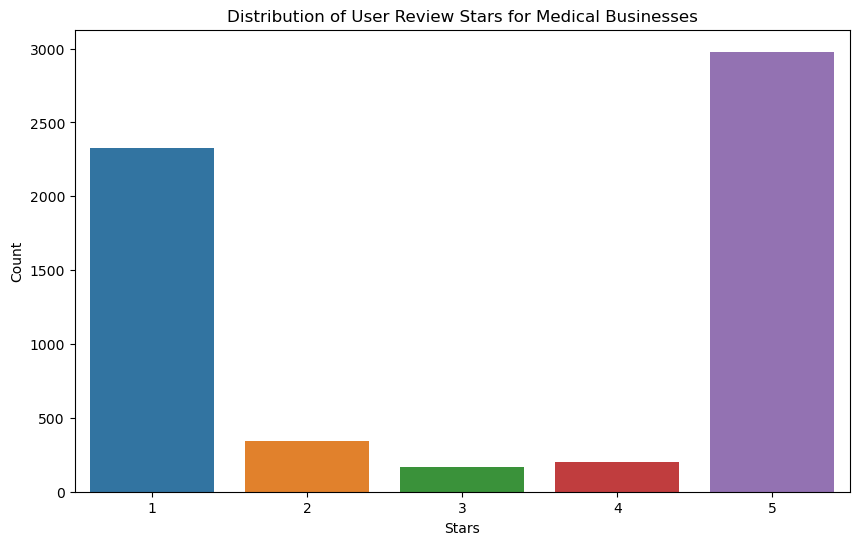

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='stars_x', data=reviews_jan20_dec20_df)
plt.title('Distribution of User Review Stars for Medical Businesses')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

Time Series Analysis: Review Volume and Average Rating Over Time

/var/folders/dd/28br3z0x5zqgpw2tllcv8gy00000gn/T/ipykernel_43410/2981023353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_jan20_dec20_df['date'] = pd.to_datetime(reviews_jan20_dec20_df['date'])
/var/folders/dd/28br3z0x5zqgpw2tllcv8gy00000gn/T/ipykernel_43410/2981023353.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = reviews_jan20_dec20_df.resample('M').size()
/var/folders/dd/28br3z0x5zqgpw2tllcv8gy00000gn/T/ipykernel_43410/2981023353.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_stars = reviews_jan20_dec20_df.resample('M')['stars_x'].mean()


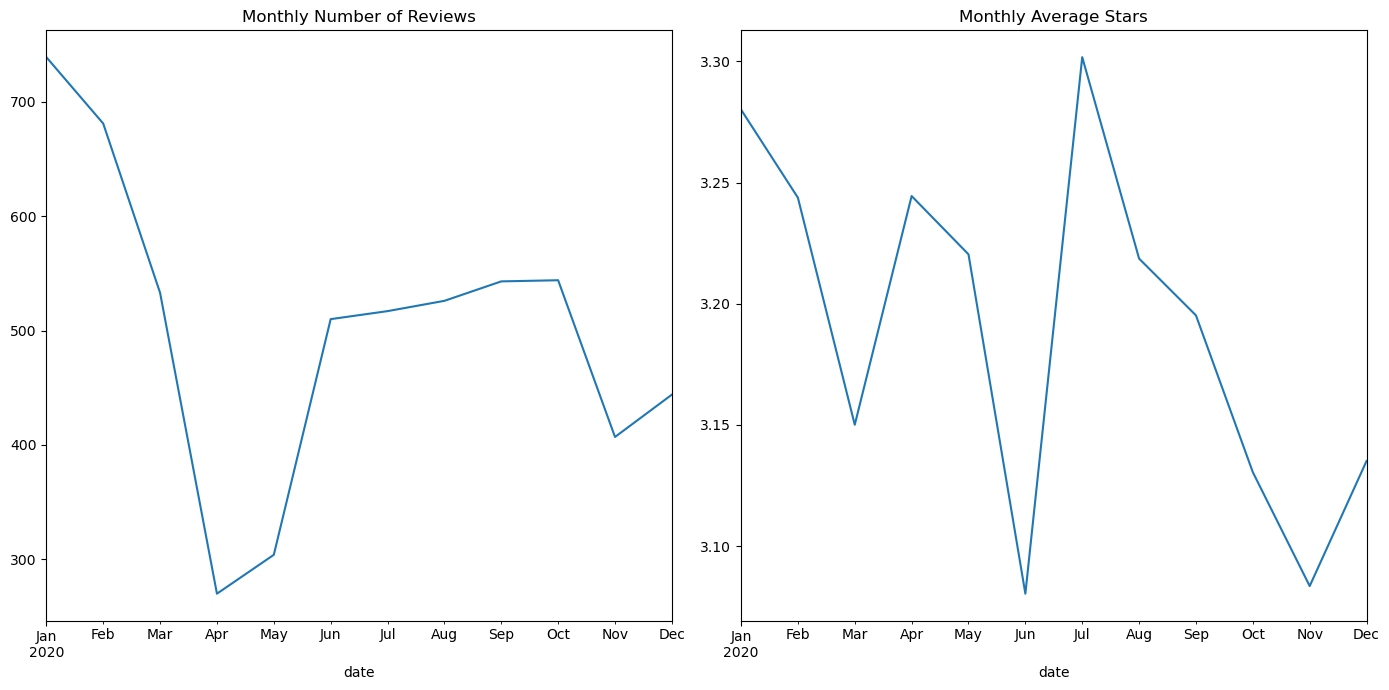

In [9]:
reviews_jan20_dec20_df['date'] = pd.to_datetime(reviews_jan20_dec20_df['date'])
reviews_jan20_dec20_df.set_index('date', inplace=True)
monthly_reviews = reviews_jan20_dec20_df.resample('M').size()
monthly_average_stars = reviews_jan20_dec20_df.resample('M')['stars_x'].mean()

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
monthly_reviews.plot(title='Monthly Number of Reviews')
plt.subplot(1, 2, 2)
monthly_average_stars.plot(title='Monthly Average Stars')
plt.tight_layout()
plt.show()

Word Cloud for Positive and Negative Reviews

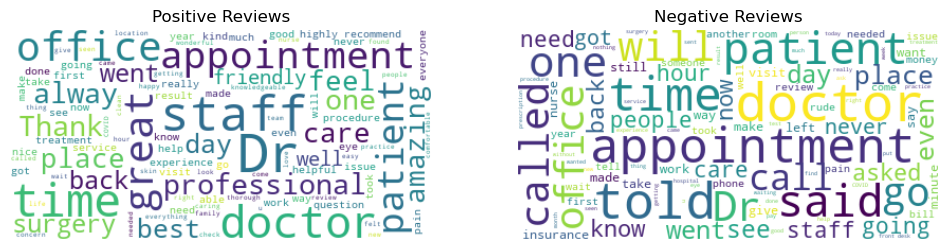

In [10]:
from wordcloud import WordCloud

positive_reviews = ' '.join(reviews_jan20_dec20_df[reviews_jan20_dec20_df['stars_x'] >= 4]['text'])
negative_reviews = ' '.join(reviews_jan20_dec20_df[reviews_jan20_dec20_df['stars_x'] <= 2]['text'])

wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews)
wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

COVID-19 Specific Mentions

In [11]:
covid_mentions = reviews_jan20_dec20_df['text'].str.contains('covid|coronavirus|pandemic', case=False, regex=True).sum()
print(f"Number of reviews mentioning COVID-19: {covid_mentions}")

Number of reviews mentioning COVID-19: 769


**1. Number of Reviews**
- **Number of reviews:** 6018
    - A total of 6,018 reviews were collected for medical businesses within the year 2020. This provides a considerable amount of data for analyzing customer sentiment and experience with medical services during the COVID-19 pandemic.

**2. Text Analysis**
- **Total number of tokens in reviews:** 760,777
- **Number of unique words in reviews:** 44,161
- **Average review length:** 126.42 words
    - The reviews are quite detailed, averaging 126.42 words, which suggests that customers are willing to share their experiences extensively. A diverse vocabulary is present in the dataset, as indicated by over 44,000 unique words, which can offer rich insights during sentiment analysis and topic modeling.

**3. Customer and Business Uniqueness**
- **Number of unique customers:** 5560
- **Number of unique medical businesses:** 2285
    - With 5,560 unique customers reviewing 2,285 unique medical businesses, the dataset reflects a wide range of interactions and opinions, which is beneficial for understanding different customer perspectives and experiences across various medical practices.

**4. Average Stars**
- **Average stars given by users for medical businesses:** 3.19
    - The average star rating is slightly above the mid-point (3.19 out of 5), indicating a moderate level of customer satisfaction. This average could be explored further to understand the factors driving higher or lower ratings.

**5. Distribution of User Review Stars for Medical Businesses**
- The distribution shows a high frequency of 5-star reviews and a relatively low frequency of 1- and 2-star reviews. This skew towards higher ratings suggests that while average satisfaction is moderate, there are many patients who report very positive experiences. It’s important to consider that satisfied customers might be more inclined to leave reviews.

**6. Monthly Number of Reviews and Monthly Average Stars**
- **Monthly Number of Reviews:** There is a noticeable drop in reviews around March, which coincides with the onset of the COVID-19 pandemic and might reflect reduced visits to medical facilities during initial lockdowns. Review counts appear to recover somewhat in subsequent months.
- **Monthly Average Stars:** The average star rating fluctuates throughout the year, with noticeable dips at certain points. These could correlate with changes in public sentiment or service quality during the pandemic's progression. The lowest points may align with pandemic waves or changes in healthcare delivery.

**7. Word Clouds Analysis**
- **Positive Reviews Word Cloud:** Words like "great," "doctor," "staff," "care," "appointment," "professional," and "amazing" are prominent, suggesting that good experiences are often associated with the quality of care, professionalism, and the overall experience at the facility.
- **Negative Reviews Word Cloud:** Negative reviews frequently mention words such as "called," "office," "doctor," "time," "patient," and "insurance," highlighting common issues related to communication, time management, and financial aspects.

**8. COVID-19 Mentions**
- **Number of reviews mentioning COVID-19:** 769
    - A significant number of reviews (769) mention COVID-19, which could imply that the pandemic has been a notable factor in patients' healthcare experiences. Analyzing the sentiment and content of these reviews may provide insights into how medical businesses adapted to the pandemic and how these adaptations were received by customers.

## Data Evaluation

**a. How the selected data are suitable for answering our business questions**
- The selected dataset is highly suitable for answering the core business questions of the project. By focusing on reviews of medical services categorized under "Doctors" from January 2020 through December 2020, the dataset directly targets the period marking the onset of the COVID-19 pandemic. This specificity allows for an in-depth analysis of patient perceptions, sentiments, and concerns during a time of unprecedented global health crisis. The inclusion of various regions and a broad spectrum of medical businesses ensures a comprehensive understanding of the healthcare landscape across different settings.

**b. Whether the sample size is appropriate, and why**
- The sample size, with 6,018 reviews covering 2,285 unique medical businesses from 5,560 unique customers, is appropriate. The volume of data is sufficient to conduct robust statistical analyses, including sentiment analysis and topic modeling, ensuring findings are representative and reliable.

**c. Whether the selected data could be biased in certain dimension in your analysis**
- The dataset's reliance on users of a specific review platform and the businesses listed there might not fully represent the broader patient population or the complete spectrum of medical service providers.

**d. The potential challenges to process the data**
- Data Cleaning and Preprocessing: The qualitative nature of review texts necessitates significant cleaning and preprocessing efforts to ensure accurate sentiment analysis and topic modeling, addressing issues like slang, typos, and inconsistencies.

- Handling Missing or Incomplete Data: The analysis may be complicated by incomplete records, such as businesses with unspecified categories or incomplete region information, necessitating strategic approaches to imputation or data exclusion.

## Data Preprocessing for Topic Modeling with LDA

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# download the set of stopwords from nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# function to handle the preprocessing
def preprocess_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # tokenize text
    tokens = text.split()
    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # reconstruct the text from tokens
    text = ' '.join(lemmatized_tokens)
    return text

# apply to each review in the DataFrame
reviews_jan20_dec20_df['preprocessed_text'] = reviews_jan20_dec20_df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minjeongkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/minjeongkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/minjeongkim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/var/folders/dd/28br3z0x5zqgpw2tllcv8gy00000gn/T/ipykernel_43410/83129933.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_jan20_dec20_df['preprocessed_text'] = reviews_jan20_dec20_df['text'].apply(preprocess_text)


## Topic Modeling with LDA

In [13]:
from gensim import corpora

# tokenize documents for LDA
texts = [doc.split() for doc in reviews_jan20_dec20_df['preprocessed_text'].tolist()]

# dictionary of documents
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

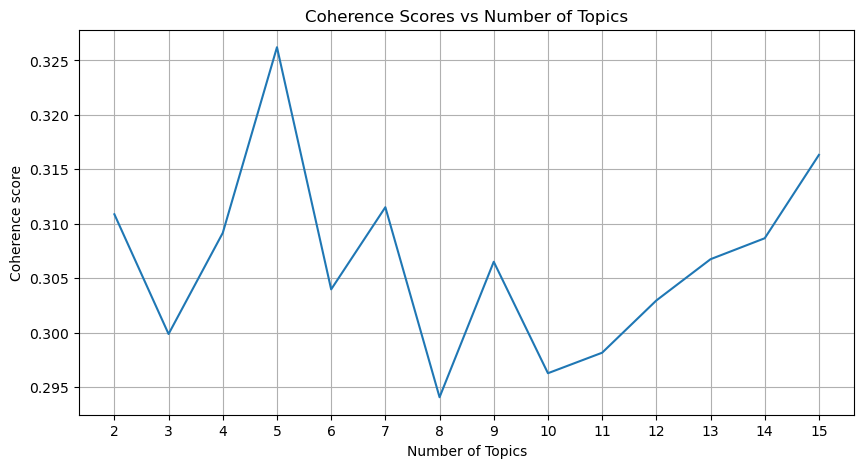

In [14]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

coherence_values = []
model_list = []

for num_topics in range(2, 16):
    model = LdaModel(corpus, id2word=dictionary, num_topics=num_topics, random_state=100)
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# coherence scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 16), coherence_values)
plt.title("Coherence Scores vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

In [15]:
from gensim import models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# fit an LDA model with the optimal number of topics
optimal_model = LdaModel(corpus, id2word=dictionary, num_topics=5, random_state=100,
                         update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# plot the topics for interpretation
lda_vis = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_vis)

**Topic 1: Negative Patient Experience and Service Issues**

- This topic seems to focus on negative experiences with healthcare services, highlighting issues related to communication, customer service, and follow-up. Words like "rude," "never call back," and "insurance" suggest problems with service providers, possibly insurance issues or dissatisfaction with hospital or clinic interactions.


**Topic 2: Doctor and Medical Care**

- This topic revolves around interactions with doctors and the medical care process. It includes references to routine visits, surgery, medical issues, and appointments. The presence of words like "surgery," "medical," "appointment," and "health" indicates a focus on the clinical aspects of healthcare and patient care management.


**Topic 3: Positive Healthcare Experiences**

- Contrary to Topic 1, this topic highlights positive experiences within the healthcare system, emphasizing the quality of care and interactions with staff. Words like "recommend," "great," "professional," "friendly," and "thank" suggest satisfaction with healthcare providers, including doctors and support staff, and a positive perception of the care received.


**Topic 4: Operational and Administrative Aspects**

- This topic addresses the operational and administrative side of healthcare experiences, focusing on logistical issues like appointment scheduling, waiting times, and COVID-19 protocols. Keywords such as "appointment," "waiting," "covid," and "receptionist" point to the patient experience regarding the efficiency and organization of healthcare facilities.


**Topic 5: Specific Treatments and Conditions**

- The final topic seems to concentrate on specific treatments and conditions, particularly dermatological and physical therapy aspects. Terms like "treatment," "skin," "pain," "acne," "tattoo," and "botox" indicate a focus on specialized treatments and the results and experiences associated with them, including both cosmetic and medical procedures.

## Data Preparation for Sentiment Analysis with BERT

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# create a binary sentiment label based on stars_x (1 for positive, 0 for negative)
reviews_jan20_dec20_df['sentiment_label'] = reviews_jan20_dec20_df['stars_x'].apply(lambda x: 1 if x > 3 else 0)

# split the data into training and testing sets
train_df, test_df = train_test_split(reviews_jan20_dec20_df, test_size=0.2, random_state=42)

/var/folders/dd/28br3z0x5zqgpw2tllcv8gy00000gn/T/ipykernel_43410/1971381955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_jan20_dec20_df['sentiment_label'] = reviews_jan20_dec20_df['stars_x'].apply(lambda x: 1 if x > 3 else 0)


## Sentiment Analysis with BERT

Sentiment Analysis

In [19]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
import torch

In [21]:
# load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="textattack/bert-base-uncased-SST-2", tokenizer="bert-base-uncased", device=-1)

In [23]:
def batch_apply_sentiment(texts, batch_size=32):  # Adjust batch_size based on your GPU/CPU memory capacity
    results = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        # Truncate texts in the batch to 512 tokens
        truncated_batch = [text[:512] for text in batch]  # This line assumes texts are already tokenized; adjust if working with raw strings
        batch_results = sentiment_pipeline(truncated_batch)
        results.extend(batch_results)
    return results

# apply sentiment analysis in batches to your test set (or a specific DataFrame)
test_texts = test_df['text'].tolist()
batch_results = batch_apply_sentiment(test_texts)
test_df['predicted_sentiment'] = [result['label'] for result in batch_results]

print(test_df[['text', 'predicted_sentiment']].head())

                                                                  text  \
date                                                                     
2020-02-14 07:00:59  This is by far your worst choice for a hospita...   
2020-04-26 16:07:58  I have been feeling unwell the last two days a...   
2020-11-22 16:41:16  Santa Barbara county makes covid testing very ...   
2020-05-10 00:37:13  Alesha and the whole staff were awesome! Defin...   
2020-12-11 19:51:00  This state of the art facility is trying their...   

                    predicted_sentiment  
date                                     
2020-02-14 07:00:59             LABEL_0  
2020-04-26 16:07:58             LABEL_1  
2020-11-22 16:41:16             LABEL_0  
2020-05-10 00:37:13             LABEL_1  
2020-12-11 19:51:00             LABEL_1  


In [30]:
pd.set_option('display.max_colwidth', None)
test_df[['text', 'predicted_sentiment']]

,text,predicted_sentiment
date,,
2020-02-14 07:00:59,"This is by far your worst choice for a hospital in the area. We waited for over 11 hours after confirming that my girlfriend needed an ultrasound. They said that they share their ultrasound tech with another hospital. It would have been faster to go to another hospital and go through the whole process again. Jefferson Urgent Care refereed is to this hospital so they should honestly get a bad review as well. The Jefferson staff was rude and uncaring for the entirety of the time we spent there. GO TO PENN, at least you will be treated like a patient.",LABEL_0
2020-04-26 16:07:58,"I have been feeling unwell the last two days and decided to go online to find an urgent care center within my Aetna Student Health Care network. SAUC is literally almost on UA's campus. It was easy and convenient to schedule an appointment online. You are required to do two questionnaires so they can evaluate whether or not you can be seen by them. Considering all of the craziness going on with COVID-19, this is smart. It also assured me that they did not think I had COVID-19. \n\nI have always been apprehensive about going I to this business complex because I worried about the parking situation but there are designated parking spots for patients!\n\nI didn't spend any time in the lobby because right as I walked in I was taken to a room. I was taken care of by the medical assistant Lauren & Nurse practitioner Candace. They were thorough & easy to talk to. Considering how sick I felt, they made me feel better just knowing that I was in competent, caring hands.\n\nI was able to get blood work & my prescribed medication here which is great because at other urgent cares, they would have made me make an additional two stops. I took off 1 star because the prescription at SAUC was $15 whereas if would've been $5.61 at CVS, but because I wanted to have the medication ASAP and did not want to stop anywhere else I paid for the convenience.\n\nOverall, I would rate SAUC 5/5 stars. I will be recommending them to everyone I know!",LABEL_1
2020-11-22 16:41:16,"Santa Barbara county makes covid testing very inaccessible. My roommate and I came here to do the walk-in test (not funded/provided by SB county). The whole process took over two hours of just waiting in line, getting checked in, waiting for a technician to swab her nose, and leaving. They didn't take my insurance and the out of pocket cost was $140, so I opted not to do it. I'm honestly just a bit appalled that it took over 2 hours when I get tested twice a week in Santa Clara county for free and it takes max 15 minutes, even with a line. I know this is not testing provided by the county of SB so of course its different. Maybe it takes a long time to process people's insurance? Also hearing that other people in line were in contact with covid positive people made us very anxious. After waiting almost an hour to check in, we waited the rest of the time in the car until they called her name (an additional hour) to avoid being in the vicinity of others.",LABEL_0
2020-05-10 00:37:13,Alesha and the whole staff were awesome! Definitely recommend. Very clean and maintained social distancing,LABEL_1
2020-12-11 19:51:00,"This state of the art facility is trying their best to accommodate all patients who are fighting their toughest battle in life-CANCER! I have a sister who battles cancer and yes, chemotherapy is the way to go. There may be some ""wholistic"" approach as what some reviewers had mentioned, but that is totally up to the patient's choice of treatment. Our choice of treatment is to go with chemotherapy and these doctors are great with what they do. They are indeed the experts in this field with years of education and experience. Thank you Cancer Care Specialists for your selfless contribution to our community!",LABEL_1
...,...,...
2020-01-08 18:35:56,I called the kind of an emergency reschedule situation and I spoke with Sarah and your other operator Mir

Sentiment Distribution

/Users/minjeongkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/minjeongkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/minjeongkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


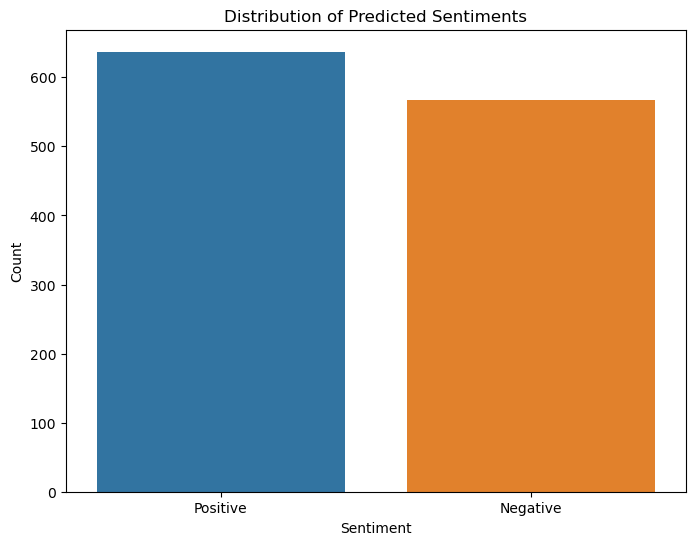

In [31]:
test_df['predicted_sentiment'] = test_df['predicted_sentiment'].map({'LABEL_0': 'Negative', 'LABEL_1': 'Positive'})

# count the occurrences of each sentiment
sentiment_counts = test_df['predicted_sentiment'].value_counts()

# plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Sentiment Over Time

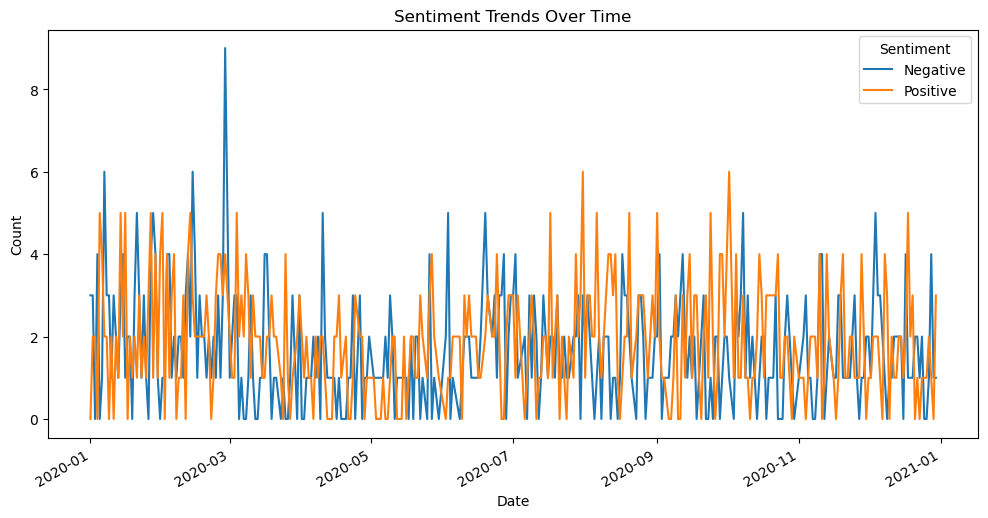

In [32]:
# ensure index is datetime
test_df.index = pd.to_datetime(test_df.index)

# resample and count sentiments per day (or another time period)
daily_sentiments = test_df.resample('D')['predicted_sentiment'].value_counts().unstack().fillna(0)

# plot
daily_sentiments.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
